<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/Undo_Stationary_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This demo shows how to back the stationary transfered predicted time series 
into the original time series.

Data: Is a tack of the number of views that an arbitrary youtube video gets.

---


Written by: Arjang Fahim<br> 
Date: 10/8/2021 <br>
Last update: 6/8/2022

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import pandas as pd

from google.colab import drive

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

**Original Series**

In [6]:
ts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimeSeries/data/original_series.csv')
ts.index = np.arange(1,len(ts)+1)

The data indicates how many views get in 72 hours and we would like to predict how many views we get in the next 72 hours<br>

The data is not stationary and we need to make a transformation to make dataset stationary.<br>

Text(0, 0.5, 'Views')

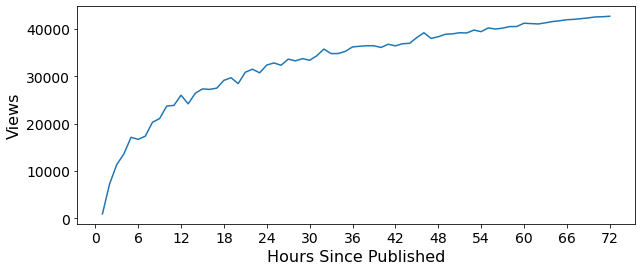

In [7]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,50000,10000), fontsize=14)
plt.ylabel('Views', fontsize=16)

The steps we should take to make the dataset ready are as follows:

(1) Normalize ($v_t$ $→$ $n_t$): 
\begin{align}
n_t = \frac{v_t -μ}{σ}
\end{align}

(2) Exponentiate ($v_t$ $→$ $e_t$):  $e_t$ $=$ $e ^ {n_t}$ <br>
(3) First Differences ($e_t$ $→$ $d_t$): $d_t$ $=$ $e_t$ - $e_{t-1}$

\begin{align}
d_t = e ^{\frac{v_t -μ}{σ}} - e ^{\frac{v_{t-1} -μ}{σ}}      
\end{align}







**Part1 - Normalize**

We do normalization for the Exponentiate steps that the number range is high and it will overflow ( See the simple normalization formula from above)

In [8]:
mu = np.mean(ts).iloc[0]
sigma = np.std(ts).iloc[0]

norm_ts = (ts - mu) / sigma

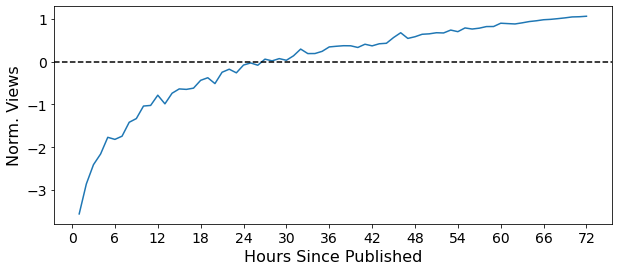

In [9]:
plt.figure(figsize=(10,4))
plt.plot(norm_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-3,2), fontsize=14)
plt.ylabel('Norm. Views', fontsize=16)

plt.axhline(0, color='k', linestyle='--')

**Part2 - Exponentiate**

We do this part because the curve look logarithmic curve, exponetiation may help to straight the line.

In [10]:
exp_ts = np.exp(norm_ts)

Text(0, 0.5, 'Exp. Norm. Views')

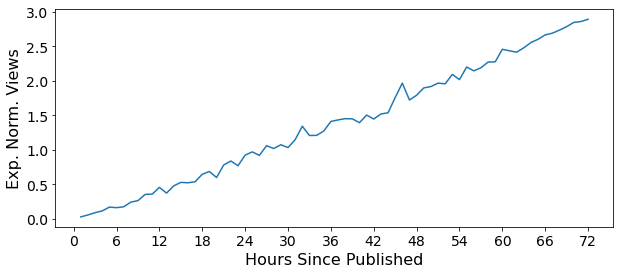

In [11]:
plt.figure(figsize=(10,4))
plt.plot(exp_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,3.5,.5), fontsize=14)
plt.ylabel('Exp. Norm. Views', fontsize=16)

In [12]:
perform_adf_test(exp_ts)

ADF Statistic: 1.648979
p-value: 0.997997


So from p-val = 0.99 indicates data is not stationary.

**Part3 - First difference**
We take first difference in order to induce stationary.

In [14]:
diff_ts = exp_ts.diff().dropna()

Text(0, 0.5, 'First Diff. \nExp. Norm. Views')

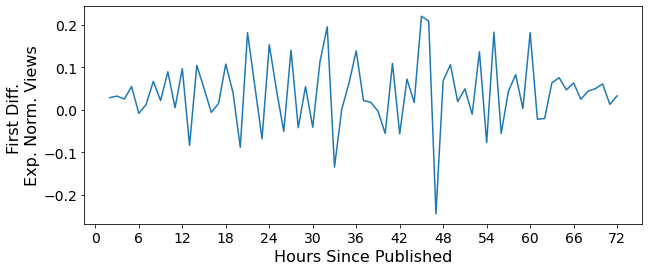

In [15]:
plt.figure(figsize=(10,4))
plt.plot(diff_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-0.2,0.3,.1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

In [16]:
perform_adf_test(diff_ts)

ADF Statistic: -4.881064
p-value: 0.000038


So now data is stationary. (p-val  = 0.000038)

**Fit AR model**

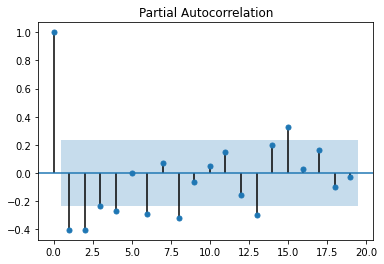

In [17]:
plot_pacf(diff_ts)
plt.show()

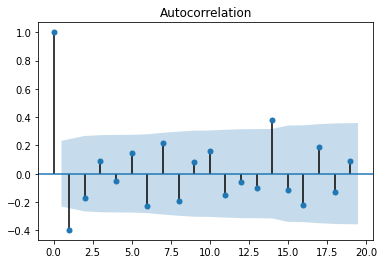

In [18]:
plot_acf(diff_ts)
plt.show()

In [19]:
#create the model
model = ARMA(diff_ts, order=(4,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

In [20]:
model_fit = model.fit()

**Predict Out 3 Hours**

In [22]:
prediction_info = model_fit.forecast(3)

predictions = prediction_info[0]
lower_bound = prediction_info[2][:,0]
upper_bound = prediction_info[2][:,1]

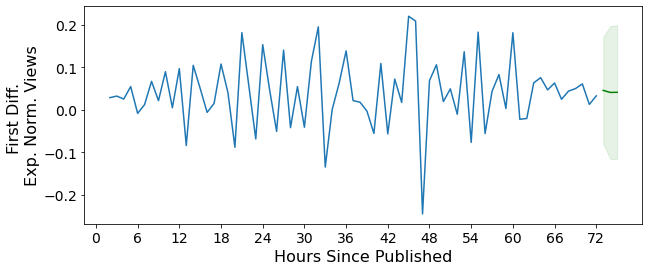

In [23]:
plt.figure(figsize=(10,4))
plt.plot(diff_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-0.2,0.3,.1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+4), predictions, color='g')
plt.fill_between(np.arange(len(ts)+1, len(ts)+4), lower_bound, upper_bound, color='g', alpha=0.1)

Undo Transformation 
($\hat{d}_{t+1}$ $→$ $\hat{v}_{t+1}$ ):

$\hat{v}_{t+1}$ = $\sigma$ln $(\hat{d}_{t+1} + {\frac{v_t -μ}{σ}})$ + μ



In [24]:
def undo_transformations(predictions, series, mu, sigma):
    first_pred = sigma*np.log(predictions[0] + np.exp((series.iloc[-1]-mu)/sigma)) + mu
    orig_predictions = [first_pred]
    
    for i in range(len(predictions[1:])):
        next_pred = sigma*np.log(predictions[i+1] + np.exp((orig_predictions[-1]-mu)/sigma)) + mu
        orig_predictions.append(next_pred)
    
    return np.array(orig_predictions).flatten()

In [25]:
orig_preds = undo_transformations(predictions, ts, mu, sigma)
orig_lower_bound = undo_transformations(lower_bound, ts, mu, sigma)
orig_upper_bound = undo_transformations(upper_bound, ts, mu, sigma)

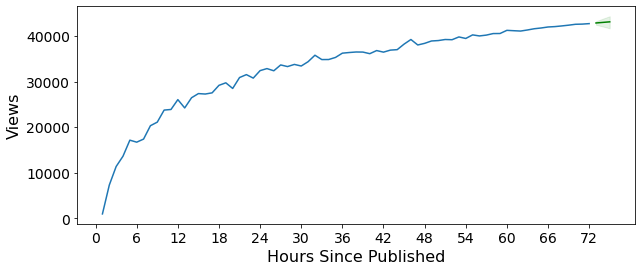

In [26]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,50000,10000), fontsize=14)
plt.ylabel('Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+4), orig_preds, color='g')
plt.fill_between(np.arange(len(ts)+1, len(ts)+4), orig_lower_bound, orig_upper_bound, color='g', alpha=0.1)

(40000.0, 45000.0)

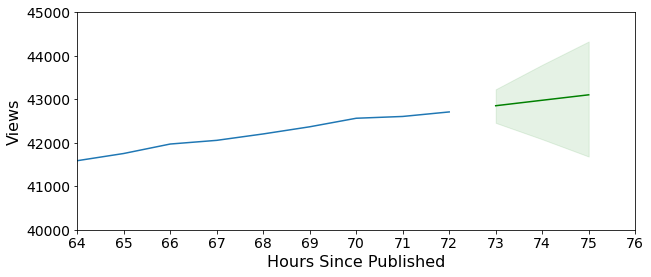

In [27]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(40000,46000,1000), fontsize=14)
plt.ylabel('Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+4), orig_preds, color='g')
plt.fill_between(np.arange(len(ts)+1, len(ts)+4), orig_lower_bound, orig_upper_bound, color='g', alpha=0.1)
plt.xlim(64,76)
plt.ylim(40000, 45000)